<a href="https://colab.research.google.com/github/mebirtukan/EyeMovementEventDetectionAlgorithms/blob/main/IDT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import  TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
import pathlib
import os



In [22]:
CWD = pathlib.Path(os.path.abspath(""))
# DATA_DIR = CWD / 'data'
DATA_DIR = CWD / 'data_practice_run'
print(DATA_DIR)

c:\Users\Ythat\Desktop\GazeFixation\webfixrt\script\data_practice_run


In [9]:
!wget www.kasprowski.pl/datasets/events.zip
!unzip events.zip > xxxy

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [25]:

def openfile(filename):
  mat = loadmat(filename)
  mdata = mat['ETdata']
  mtype = mdata.dtype
  ndata = {n: mdata[n][0,0] for n in mtype.names}
  ndata

  data_headline = ndata['pos']
  print(data_headline)
  data_headline = data_headline[0]
  data_raw = ndata['pos']
  len(data_raw)
  pdata = pd.DataFrame(data_raw,columns=data_headline)
  df=pd.DataFrame(pdata)
  df=pd.DataFrame(pdata)
  df.dtypes
  if 1.0 not in df:
    return [],[]
  df[1.0]=df[1.0].astype(int)
  df[1.0].dtypes
  x=pdata.iloc[:, 3:5].values
  y=pdata.iloc[:, 5].values
  x[0]
  x.shape[0]
  return x ,y

In [26]:
## we don't use it here for now
def open_list_of_files(files_to_load):
  samples = []
  labels =[]
  for my_file in files_to_load:
    sam,lab = openfile(my_file)
    #ssam,slab = make_sequences(sam,lab,50)
    print('Number of samples so far:',len(samples))
    samples.extend(sam)
    labels.extend(lab)
  samples = np.array(samples)
  labels = np.array(labels)
  print('Number of samples at the end:',len(samples))
  return samples,labels
# files_to_load = ['data/UH33_img_vy_labelled_MN.mat','data/UH47_img_Europe_labelled_RA.mat','data/UH21_img_Rome_labelled_MN.mat']
#files_to_load = ['data/TH34_img_Europe_labelled_MN.mat', 'data/UH21_img_Rome_labelled_RA.mat', 'data/UH47_img_Europe_labelled_MN.mat', 'data/UH27_img_vy_labelled_MN.mat']
files_to_load = [file for file in DATA_DIR.iterdir()]

#s,l = open_list_of_files(files_to_load)
x,y=open_list_of_files(files_to_load)
print('X', x)
#print(x.shape)
#print(y.shape)
#print(s1.shape)
#print(l1.shape)

[[     nan  24.      21.     123.2532  22.6264   1.    ]
 [     nan  24.      20.     123.5395  22.9064   1.    ]
 [     nan  24.      20.     123.223   21.9909   1.    ]
 ...
 [     nan  23.      21.     125.1489 521.9895   4.    ]
 [     nan  23.      21.     124.1309 522.6786   4.    ]
 [     nan  23.      21.     123.5832 523.5587   4.    ]]
Number of samples so far: 0
[[     nan  24.      21.     123.2532  22.6264   1.    ]
 [     nan  24.      20.     123.5395  22.9064   1.    ]
 [     nan  24.      20.     123.223   21.9909   1.    ]
 ...
 [     nan  23.      21.     125.1489 521.9895   4.    ]
 [     nan  23.      21.     124.1309 522.6786   4.    ]
 [     nan  23.      21.     123.5832 523.5587   4.    ]]
Number of samples so far: 1658
[[5.78164147e+09 1.90000000e+01 2.00000000e+01 5.22047500e+02
  3.72409700e+02 1.00000000e+00]
 [5.78164347e+09 1.90000000e+01 2.00000000e+01 5.22633900e+02
  3.71951700e+02 1.00000000e+00]
 [5.78164547e+09 1.90000000e+01 2.00000000e+01 5.230432

In [ ]:
#x,y=openfile('data/UH33_img_vy_labelled_MN.mat')

In [ ]:
# sequence 
def make_sequences(samples, labels, sequence_dim = 100, sequence_lag = 1, sequence_attributes = 2):
    nsamples = []
    nlabels = [] 
    for i in range(0,samples.shape[0]-sequence_dim,sequence_lag):
            nsample = np.zeros((sequence_dim,sequence_attributes))
            for j in range(i,i+sequence_dim):
                nsample[j-i,0] = samples[j,0]
                nsample[j-i,1] = samples[j,1]
            nlabel = labels[i+sequence_dim//2]
            nsamples.append(nsample)
            nlabels.append(nlabel)
        
    samples = np.array(nsamples)
    labels = np.array(nlabels)
    return samples,labels 

In [27]:
sequence_dim = 3
print("Converting to sequences of length {}".format(sequence_dim))
X,Y = make_sequences(x, y, sequence_dim)
#x1,y1 = make_sequences(s1, l1, sequence_dim)
print("done:",X.shape )

Converting to sequences of length 3


NameError: name 'make_sequences' is not defined

In [41]:
#X = X.reshape(-1, sequence_dim*2)
x.shape

(197568, 2)

In [ ]:
type(X)


numpy.ndarray

In [ ]:
X[0][1]

array([514.5022, 403.0691])

In [ ]:
#calculate dsipersion for sequence of previous to next samples

In [66]:
from scipy.spatial import distance
import csv
import numpy as np

def calcu_disp(data, disp_thres):
  Xs = data[:,[0]]
  Ys = data[:,[1]]
  # print('Xs', Xs)
  # print('Ys', Ys)

  
  disper = [] #x values difference
  #Y = [] #y values difference 
  #Dispersion=[]
  mvmts=[]

  for i in range(len(data) - 1):
    if i>=sequence_dim:
      max_x = max((Xs[i-sequence_dim:i+sequence_dim]))
      min_x = min((Xs[i-sequence_dim:i+sequence_dim]))
      max_y = max((Ys[i-sequence_dim:i+sequence_dim]))
      min_y = min((Ys[i-sequence_dim:i+sequence_dim]))
      print('values', max_x - min_x + (max_y - min_y))

      disper.append(max((Xs[i-sequence_dim:i+sequence_dim])) - min((Xs[i-sequence_dim:i+sequence_dim]) )+(max(Ys[i-sequence_dim:i+sequence_dim]) - min(Ys[i-sequence_dim:i+sequence_dim]) ))
    else:
      disper.append(0)
    #Y.append(max(Ys[i:i+sequence_dim]) - min(Ys[i:i+sequence_dim]) )
  #Dispersion=(X+Y)
  #Dispersion=np.absolute(Dispersion)
  Dispersion=np.absolute(disper)
  print(Dispersion)
  # print('Max Dipersion=', max(Dispersion))
  # print('min disp=', min(Dispersion))

  for D in Dispersion:
    if(D<disp_thres):
      mvmts.append(1)
    else:
      mvmts.append(2)
  return mvmts
  #store 1 in mvmts[] if dispersion is less than threshold else store 2
  
y1=calcu_disp(x[:10], disp_thres=0.1)
  

  




values [5.4406]
values [5.4406]
values [4.5251]
values [4.3082]
values [3.8655]
values [3.8655]
[0 0 0 array([5.4406]) array([5.4406]) array([4.5251]) array([4.3082])
 array([3.8655]) array([3.8655])]


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2875245865.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


In [ ]:
#calculate dsipersion for sequence of current to next samples

In [53]:
y_pred=np.array(y1)
y_input = (y[:-1])
print(len(y_input))

197567


In [54]:
len(y_pred),

(197567,)

In [55]:
thresholds=[0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7, 7.5, 8, 9, 10, 12,13, 14, 15, 16, 20, 22, 25, 30, 35, 50]


In [57]:
#thresholds=[x/10 for x in range(0,50)]
#y=y[:-1]
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, cohen_kappa_score, recall_score
fixation_recall=[]
fixation_precision=[]
fixation_f1_score=[]
saccade_recall=[]
saccade_precision=[]
saccade_f1_score=[]


for t in thresholds:
  y1=calcu_disp(x, disp_thres=t)
  y_pred=np.array(y1)
    #y_pred=np.array(y1)
  # y_pred=(y_pred[:-1])
  #print(len(y_real))
 # print(len(y_pred))
  cm=confusion_matrix(y_input, y_pred)
  print(cm)
  print(classification_report(y_input,y_pred))
  print('Kochen kappa for threshold', t, cohen_kappa_score(y_input, y_pred))
  #print(classification_report(y,y_pred['f1-score']))
  #Fixation accuracy calculation
  sumf=cm[0][0]+cm[0][1]
  Tc=cm[0][0]
  fixation_recall.append(Tc*100/sumf)
  print('Fixation recall at threshol',t, 'is', fixation_recall[-1])
  #fixation precision 
  sumfp=cm[0][0]+cm[1][0]
  Tcfp=cm[0][0]
  fixation_precision.append(Tcfp*100/sumfp)
  print('Fixation precission at threshold', t, 'is', fixation_precision[-1])
  #fixation f1_score
  multiple_recal_prec=2*((Tcfp*100/sumfp)*(Tc*100/sumf))
  add_recall_prec=((Tc*100/sumf)+Tcfp*100/sumfp)
  result_f1_score=multiple_recal_prec/add_recall_prec
  fixation_f1_score.append(result_f1_score)
  print('fixation_f1_score for threshold', t, 'is', fixation_f1_score[-1])
  #Saccade accuracy calculation
  sums=cm[1][0]+cm[1][1]
  Tcs=cm[1][1]
  saccade_recall.append(Tcs*100/sums)
  print('Saccade recall at threshol',t, 'is', saccade_recall[-1])
  #Saccade precison
  sum_saccP=cm[0][1]+cm[1][1]
  Tc_saccP=cm[1][1]
  saccade_precision.append(Tc_saccP*100/sum_saccP)
  print('saccade_precision for threshold', t, 'is', saccade_precision[-1])
  #saccade f1_score
  multiply=2*((Tc_saccP*100/sum_saccP)*(Tcs*100/sums))
  addition=(Tcs*100/sums)+(Tc_saccP*100/sum_saccP)
  saccade_f1_score.append(multiply/addition)
  print('saccade_f1_score for threshold', t, 'is', saccade_f1_score[-1])
  
  
  

C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[     0 120318      0      0      0      0]
 [     0  14668      0      0      0      0]
 [     0   8187      0      0      0      0]
 [     0  45708      0      0      0      0]
 [     0   8449      0      0      0      0]
 [     0    237      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00    120318
           2       0.07      1.00      0.14     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.07    197567
   macro avg       0.01      0.17      0.02    197567
weighted avg       0.01      0.07      0.01    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\3736577154.py:32: RuntimeWarning: invalid va

Kochen kappa for threshold 0 0.0
Fixation recall at threshol 0 is 0.0
Fixation precission at threshold 0 is nan
fixation_f1_score for threshold 0 is nan
Saccade recall at threshol 0 is 100.0
saccade_precision for threshold 0 is 10.866312061991614
saccade_f1_score for threshold 0 is 19.602549881727185


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[   729 119589      0      0      0      0]
 [     0  14668      0      0      0      0]
 [     0   8187      0      0      0      0]
 [   383  45325      0      0      0      0]
 [  3362   5087      0      0      0      0]
 [     1    236      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.16      0.01      0.01    120318
           2       0.08      1.00      0.14     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.08    197567
   macro avg       0.04      0.17      0.03    197567
weighted avg       0.10      0.08      0.02    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 1.0 -0.009218697636887319
Fixation recall at threshol 1.0 is 0.6058943798932828
Fixation precission at threshold 1.0 is 100.0
fixation_f1_score for threshold 1.0 is 1.2044908176162976
Saccade recall at threshol 1.0 is 100.0
saccade_precision for threshold 1.0 is 10.925314881160759
saccade_f1_score for threshold 1.0 is 19.698505959375524


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[  6276 114042      0      0      0      0]
 [     2  14666      0      0      0      0]
 [     4   8183      0      0      0      0]
 [  2545  43163      0      0      0      0]
 [  3377   5072      0      0      0      0]
 [     3    234      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.51      0.05      0.09    120318
           2       0.08      1.00      0.15     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.11    197567
   macro avg       0.10      0.18      0.04    197567
weighted avg       0.32      0.11      0.07    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 1.5 -0.0014387715490027375
Fixation recall at threshol 1.5 is 5.216177130603899
Fixation precission at threshold 1.5 is 99.96814272061167
fixation_f1_score for threshold 1.5 is 9.915005213434863
Saccade recall at threshol 1.5 is 99.98636487592037
saccade_precision for threshold 1.5 is 11.394785094943593
saccade_f1_score for threshold 1.5 is 20.458096194621135


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[ 18708 101610      0      0      0      0]
 [    13  14655      0      0      0      0]
 [    10   8177      0      0      0      0]
 [  7125  38583      0      0      0      0]
 [  3404   5045      0      0      0      0]
 [     5    232      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.64      0.16      0.25    120318
           2       0.09      1.00      0.16     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.17    197567
   macro avg       0.12      0.19      0.07    197567
weighted avg       0.40      0.17      0.16    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 2.0 0.018208653958781906
Fixation recall at threshol 2.0 is 15.548795691417743
Fixation precission at threshold 2.0 is 99.93055926499653
fixation_f1_score for threshold 2.0 is 26.910435201634076
Saccade recall at threshol 2.0 is 99.91137169348241
saccade_precision for threshold 2.0 is 12.604825183847245
saccade_f1_score for threshold 2.0 is 22.385494871422786


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[35585 84733     0     0     0     0]
 [   23 14645     0     0     0     0]
 [   18  8169     0     0     0     0]
 [12539 33169     0     0     0     0]
 [ 3428  5021     0     0     0     0]
 [    6   231     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.69      0.30      0.41    120318
           2       0.10      1.00      0.18     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.25    197567
   macro avg       0.13      0.22      0.10    197567
weighted avg       0.43      0.25      0.27    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 2.5 0.05131258990528409
Fixation recall at threshol 2.5 is 29.575790820991042
Fixation precission at threshold 2.5 is 99.93540777353404
fixation_f1_score for threshold 2.5 is 45.64344625014431
Saccade recall at threshol 2.5 is 99.84319607308427
saccade_precision for threshold 2.5 is 14.736662037875586
saccade_f1_score for threshold 2.5 is 25.6826192939691


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[53222 67096     0     0     0     0]
 [   45 14623     0     0     0     0]
 [   32  8155     0     0     0     0]
 [18212 27496     0     0     0     0]
 [ 3455  4994     0     0     0     0]
 [    7   230     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.71      0.44      0.55    120318
           2       0.12      1.00      0.21     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.34    197567
   macro avg       0.14      0.24      0.13    197567
weighted avg       0.44      0.34      0.35    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 3.0 0.09162583189269835
Fixation recall at threshol 3.0 is 44.23444538639273
Fixation precission at threshold 3.0 is 99.91551992791034
fixation_f1_score for threshold 3.0 is 61.32096667338767
Saccade recall at threshol 3.0 is 99.69320970820834
saccade_precision for threshold 3.0 is 17.894247359855115
saccade_f1_score for threshold 3.0 is 30.342266073225645


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[68329 51989     0     0     0     0]
 [   62 14606     0     0     0     0]
 [   53  8134     0     0     0     0]
 [23154 22554     0     0     0     0]
 [ 3488  4961     0     0     0     0]
 [    9   228     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.72      0.57      0.63    120318
           2       0.14      1.00      0.25     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.42    197567
   macro avg       0.14      0.26      0.15    197567
weighted avg       0.45      0.42      0.40    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 3.5 0.13188120989028607
Fixation recall at threshol 3.5 is 56.79033893515517
Fixation precission at threshold 3.5 is 99.90934479683
fixation_f1_score for threshold 3.5 is 72.41731978866933
Saccade recall at threshol 3.5 is 99.5773111535315
saccade_precision for threshold 3.5 is 21.932577520834897
saccade_f1_score for threshold 3.5 is 35.947479172563156


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[80163 40155     0     0     0     0]
 [   75 14593     0     0     0     0]
 [   84  8103     0     0     0     0]
 [27221 18487     0     0     0     0]
 [ 3533  4916     0     0     0     0]
 [   13   224     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.72      0.67      0.69    120318
           2       0.17      0.99      0.29     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.48    197567
   macro avg       0.15      0.28      0.16    197567
weighted avg       0.45      0.48      0.44    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 4.0 0.16747891326957387
Fixation recall at threshol 4.0 is 66.62594125567247
Fixation precission at threshold 4.0 is 99.90652807896508
fixation_f1_score for threshold 4.0 is 79.94076467420572
Saccade recall at threshol 4.0 is 99.4886828470139
saccade_precision for threshold 4.0 is 26.654854971871117
saccade_f1_score for threshold 4.0 is 42.04506165725481


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[89670 30648     0     0     0     0]
 [   92 14576     0     0     0     0]
 [  134  8053     0     0     0     0]
 [30458 15250     0     0     0     0]
 [ 3597  4852     0     0     0     0]
 [   15   222     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.72      0.75      0.73    120318
           2       0.20      0.99      0.33     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.53    197567
   macro avg       0.15      0.29      0.18    197567
weighted avg       0.46      0.53      0.47    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 4.5 0.19970001732152898
Fixation recall at threshol 4.5 is 74.52750211938363
Fixation precission at threshold 4.5 is 99.8975067400459
fixation_f1_score for threshold 4.5 is 85.36747905559787
Saccade recall at threshol 4.5 is 99.37278429233706
saccade_precision for threshold 4.5 is 32.23067397841854
saccade_f1_score for threshold 4.5 is 48.674280371335065


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[96580 23738     0     0     0     0]
 [  114 14554     0     0     0     0]
 [  216  7971     0     0     0     0]
 [33132 12576     0     0     0     0]
 [ 3652  4797     0     0     0     0]
 [   18   219     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.72      0.80      0.76    120318
           2       0.23      0.99      0.37     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.56    197567
   macro avg       0.16      0.30      0.19    197567
weighted avg       0.46      0.56      0.49    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 5.0 0.22409103093493066
Fixation recall at threshol 5.0 is 80.27061620040227
Fixation precission at threshold 5.0 is 99.88210230210768
fixation_f1_score for threshold 5.0 is 89.00890273348939
Saccade recall at threshol 5.0 is 99.22279792746114
saccade_precision for threshold 5.0 is 38.007938995090356
saccade_f1_score for threshold 5.0 is 54.96223564954683


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[101585  18733      0      0      0      0]
 [   139  14529      0      0      0      0]
 [   292   7895      0      0      0      0]
 [ 35166  10542      0      0      0      0]
 [  3712   4737      0      0      0      0]
 [    20    217      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.72      0.84      0.78    120318
           2       0.26      0.99      0.41     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.59    197567
   macro avg       0.16      0.31      0.20    197567
weighted avg       0.46      0.59      0.50    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 5.5 0.24261114117432958
Fixation recall at threshol 5.5 is 84.43042603766685
Fixation precission at threshold 5.5 is 99.86335574692305
fixation_f1_score for threshold 5.5 is 91.50070707343656
Saccade recall at threshol 5.5 is 99.05235887646577
saccade_precision for threshold 5.5 is 43.68047621910889
saccade_f1_score for threshold 5.5 is 60.625912789484666


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[105111  15207      0      0      0      0]
 [   179  14489      0      0      0      0]
 [   401   7786      0      0      0      0]
 [ 36888   8820      0      0      0      0]
 [  3768   4681      0      0      0      0]
 [    21    216      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.72      0.87      0.79    120318
           2       0.28      0.99      0.44     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.61    197567
   macro avg       0.17      0.31      0.20    197567
weighted avg       0.46      0.61      0.51    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 6.0 0.2548166140067808
Fixation recall at threshol 6.0 is 87.36099336757593
Fixation precission at threshold 6.0 is 99.82999335169532
fixation_f1_score for threshold 6.0 is 93.18020637566043
Saccade recall at threshol 6.0 is 98.7796563948732
saccade_precision for threshold 6.0 is 48.79108297413793
saccade_f1_score for threshold 6.0 is 65.31872689568118


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[107854  12464      0      0      0      0]
 [   215  14453      0      0      0      0]
 [   556   7631      0      0      0      0]
 [ 38242   7466      0      0      0      0]
 [  3830   4619      0      0      0      0]
 [    23    214      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.72      0.90      0.80    120318
           2       0.31      0.99      0.47     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.62    197567
   macro avg       0.17      0.31      0.21    197567
weighted avg       0.46      0.62      0.52    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 6.5 0.26432552618743044
Fixation recall at threshol 6.5 is 89.64078525241443
Fixation precission at threshold 6.5 is 99.80105303093394
fixation_f1_score for threshold 6.5 is 94.44845809962914
Saccade recall at threshol 6.5 is 98.53422416143987
saccade_precision for threshold 6.5 is 53.69469108741687
saccade_f1_score for threshold 6.5 is 69.51064085607791


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[109928  10390      0      0      0      0]
 [   249  14419      0      0      0      0]
 [   684   7503      0      0      0      0]
 [ 39279   6429      0      0      0      0]
 [  3878   4571      0      0      0      0]
 [    24    213      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.71      0.91      0.80    120318
           2       0.33      0.98      0.50     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.63    197567
   macro avg       0.17      0.32      0.22    197567
weighted avg       0.46      0.63      0.52    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 7 0.27161835398046474
Fixation recall at threshol 7 is 91.36455060755664
Fixation precission at threshold 7 is 99.7740000181526
fixation_f1_score for threshold 7 is 95.38428165469966
Saccade recall at threshol 7 is 98.30242705208617
saccade_precision for threshold 7 is 58.12003708331654
saccade_f1_score for threshold 7 is 73.05013045570838


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[111391   8927      0      0      0      0]
 [   291  14377      0      0      0      0]
 [   836   7351      0      0      0      0]
 [ 40179   5529      0      0      0      0]
 [  3926   4523      0      0      0      0]
 [    25    212      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.71      0.93      0.80    120318
           2       0.35      0.98      0.52     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.64    197567
   macro avg       0.18      0.32      0.22    197567
weighted avg       0.46      0.64      0.53    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 7.5 0.2757134295268504
Fixation recall at threshol 7.5 is 92.58049502152629
Fixation precission at threshold 7.5 is 99.73943876363245
fixation_f1_score for threshold 7.5 is 96.02672413793103
Saccade recall at threshol 7.5 is 98.01608944641396
saccade_precision for threshold 7.5 is 61.693271541366286
saccade_f1_score for threshold 7.5 is 75.72421784472769


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[112519   7799      0      0      0      0]
 [   337  14331      0      0      0      0]
 [   992   7195      0      0      0      0]
 [ 40883   4825      0      0      0      0]
 [  3959   4490      0      0      0      0]
 [    28    209      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.71      0.94      0.81    120318
           2       0.37      0.98      0.54     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.64    197567
   macro avg       0.18      0.32      0.22    197567
weighted avg       0.46      0.64      0.53    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 8 0.27857249001779427
Fixation recall at threshol 8 is 93.51801060522948
Fixation precission at threshold 8 is 99.7013893811583
fixation_f1_score for threshold 8 is 96.51076020482559
Saccade recall at threshol 8 is 97.70248159258249
saccade_precision for threshold 8 is 64.75824672390421
saccade_f1_score for threshold 8 is 77.89010272297408


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[114217   6101      0      0      0      0]
 [   452  14216      0      0      0      0]
 [  1301   6886      0      0      0      0]
 [ 42061   3647      0      0      0      0]
 [  4047   4402      0      0      0      0]
 [    32    205      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.70      0.95      0.81    120318
           2       0.40      0.97      0.57     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.18      0.32      0.23    197567
weighted avg       0.46      0.65      0.53    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 9 0.28142469240675905
Fixation recall at threshol 9 is 94.92927076580395
Fixation precission at threshold 9 is 99.60582197455284
fixation_f1_score for threshold 9 is 97.21133509513291
Saccade recall at threshol 9 is 96.91846195800382
saccade_precision for threshold 9 is 69.97096027956883
saccade_f1_score for threshold 9 is 81.26911533514361


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[115325   4993      0      0      0      0]
 [   566  14102      0      0      0      0]
 [  1678   6509      0      0      0      0]
 [ 42909   2799      0      0      0      0]
 [  4133   4316      0      0      0      0]
 [    33    204      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.70      0.96      0.81    120318
           2       0.43      0.96      0.59     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.66    197567
   macro avg       0.19      0.32      0.23    197567
weighted avg       0.46      0.66      0.54    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 10 0.28163849521210704
Fixation recall at threshol 10 is 95.85016373277482
Fixation precission at threshold 10 is 99.5116100473721
fixation_f1_score for threshold 10 is 97.64657570202661
Saccade recall at threshol 10 is 96.14125988546496
saccade_precision for threshold 10 is 73.85179366326264
saccade_f1_score for threshold 10 is 83.53523087403372


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[116666   3652      0      0      0      0]
 [   834  13834      0      0      0      0]
 [  2478   5709      0      0      0      0]
 [ 43978   1730      0      0      0      0]
 [  4259   4190      0      0      0      0]
 [    38    199      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.69      0.97      0.81    120318
           2       0.47      0.94      0.63     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.66    197567
   macro avg       0.19      0.32      0.24    197567
weighted avg       0.46      0.66      0.54    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 12 0.2782659971658792
Fixation recall at threshol 12 is 96.96471018467727
Fixation precission at threshold 12 is 99.29021276595745
fixation_f1_score for threshold 12 is 98.11368357315257
Saccade recall at threshol 12 is 94.31415325879466
saccade_precision for threshold 12 is 79.11472034770674
saccade_f1_score for threshold 12 is 86.0483921129564


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[117115   3203      0      0      0      0]
 [  1003  13665      0      0      0      0]
 [  2819   5368      0      0      0      0]
 [ 44283   1425      0      0      0      0]
 [  4344   4105      0      0      0      0]
 [    43    194      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.69      0.97      0.81    120318
           2       0.49      0.93      0.64     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.66    197567
   macro avg       0.20      0.32      0.24    197567
weighted avg       0.46      0.66      0.54    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 13 0.275635023518767
Fixation recall at threshol 13 is 97.33788793031799
Fixation precission at threshold 13 is 99.15084915084915
fixation_f1_score for threshold 13 is 98.2360046301733
Saccade recall at threshol 13 is 93.161985274066
saccade_precision for threshold 13 is 81.01138249940716
saccade_f1_score for threshold 13 is 86.66286149162862


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[117537   2781      0      0      0      0]
 [  1159  13509      0      0      0      0]
 [  3170   5017      0      0      0      0]
 [ 44519   1189      0      0      0      0]
 [  4409   4040      0      0      0      0]
 [    45    192      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.69      0.98      0.81    120318
           2       0.51      0.92      0.65     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.66    197567
   macro avg       0.20      0.32      0.24    197567
weighted avg       0.46      0.66      0.54    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 14 0.27332761045766996
Fixation recall at threshol 14 is 97.68862514337007
Fixation precission at threshold 14 is 99.02355597492755
fixation_f1_score for threshold 14 is 98.35156099642698
Saccade recall at threshol 14 is 92.09844559585493
saccade_precision for threshold 14 is 82.92817679558011
saccade_f1_score for threshold 14 is 87.27307965630855


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[117869   2449      0      0      0      0]
 [  1316  13352      0      0      0      0]
 [  3509   4678      0      0      0      0]
 [ 44703   1005      0      0      0      0]
 [  4479   3970      0      0      0      0]
 [    49    188      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.69      0.98      0.81    120318
           2       0.52      0.91      0.66     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.66    197567
   macro avg       0.20      0.31      0.24    197567
weighted avg       0.46      0.66      0.54    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 15 0.2706120479181866
Fixation recall at threshol 15 is 97.96456058112668
Fixation precission at threshold 15 is 98.89583420732475
fixation_f1_score for threshold 15 is 98.42799463889804
Saccade recall at threshol 15 is 91.02808835560404
saccade_precision for threshold 15 is 84.50098095057275
saccade_f1_score for threshold 15 is 87.64317831238309


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[118133   2185      0      0      0      0]
 [  1476  13192      0      0      0      0]
 [  3828   4359      0      0      0      0]
 [ 44849    859      0      0      0      0]
 [  4537   3912      0      0      0      0]
 [    52    185      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.68      0.98      0.81    120318
           2       0.53      0.90      0.67     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.66    197567
   macro avg       0.20      0.31      0.25    197567
weighted avg       0.46      0.66      0.54    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 16 0.2676653093442165
Fixation recall at threshol 16 is 98.18397912199339
Fixation precission at threshold 16 is 98.76597914872626
fixation_f1_score for threshold 16 is 98.47411921126007
Saccade recall at threshol 16 is 89.9372784292337
saccade_precision for threshold 16 is 85.790466280809
saccade_f1_score for threshold 16 is 87.81494425029122


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[118823   1495      0      0      0      0]
 [  2041  12627      0      0      0      0]
 [  4888   3299      0      0      0      0]
 [ 45161    547      0      0      0      0]
 [  4768   3681      0      0      0      0]
 [    58    179      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.68      0.99      0.80    120318
           2       0.58      0.86      0.69     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.67    197567
   macro avg       0.21      0.31      0.25    197567
weighted avg       0.45      0.67      0.54    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 20 0.25645769686207565
Fixation recall at threshol 20 is 98.75745939925864
Fixation precission at threshold 20 is 98.31132512576119
fixation_f1_score for threshold 20 is 98.53388727185279
Saccade recall at threshol 20 is 86.08535587673848
saccade_precision for threshold 20 is 89.41368078175896
saccade_f1_score for threshold 20 is 87.71795762417506


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[118996   1322      0      0      0      0]
 [  2359  12309      0      0      0      0]
 [  5293   2894      0      0      0      0]
 [ 45236    472      0      0      0      0]
 [  4877   3572      0      0      0      0]
 [    64    173      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.67      0.99      0.80    120318
           2       0.59      0.84      0.70     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.66    197567
   macro avg       0.21      0.30      0.25    197567
weighted avg       0.45      0.66      0.54    197567

Kochen kappa for threshold 22 0.24992835477211273
Fixation recall at threshol 22 is 98.90124503399325
Fixation precission at th

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning:

[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[119196   1122      0      0      0      0]
 [  2872  11796      0      0      0      0]
 [  5821   2366      0      0      0      0]
 [ 45302    406      0      0      0      0]
 [  5034   3415      0      0      0      0]
 [    66    171      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.67      0.99      0.80    120318
           2       0.61      0.80      0.70     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.66    197567
   macro avg       0.21      0.30      0.25    197567
weighted avg       0.45      0.66      0.54    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 25 0.2396376846716024
Fixation recall at threshol 25 is 99.06747120131651
Fixation precission at threshold 25 is 97.64721302880362
fixation_f1_score for threshold 25 is 98.35221506192603
Saccade recall at threshol 25 is 80.41996182165258
saccade_precision for threshold 25 is 91.3144449605202
saccade_f1_score for threshold 25 is 85.52164141231059


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[119439    879      0      0      0      0]
 [  3525  11143      0      0      0      0]
 [  6579   1608      0      0      0      0]
 [ 45377    331      0      0      0      0]
 [  5232   3217      0      0      0      0]
 [    74    163      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.66      0.99      0.79    120318
           2       0.64      0.76      0.70     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.66    197567
   macro avg       0.22      0.29      0.25    197567
weighted avg       0.45      0.66      0.54    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 30 0.22580555645831746
Fixation recall at threshol 30 is 99.26943599461427
Fixation precission at threshold 30 is 97.13330730945643
fixation_f1_score for threshold 30 is 98.18975509902089
Saccade recall at threshol 30 is 75.96809380965367
saccade_precision for threshold 30 is 92.6884045915821
saccade_f1_score for threshold 30 is 83.49943799175722


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[119698    620      0      0      0      0]
 [  4281  10387      0      0      0      0]
 [  7134   1053      0      0      0      0]
 [ 45409    299      0      0      0      0]
 [  5411   3038      0      0      0      0]
 [    79    158      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.66      0.99      0.79    120318
           2       0.67      0.71      0.69     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.66    197567
   macro avg       0.22      0.28      0.25    197567
weighted avg       0.45      0.66      0.53    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 35 0.21135593842600198
Fixation recall at threshol 35 is 99.48469888129789
Fixation precission at threshold 35 is 96.54699586220246
fixation_f1_score for threshold 35 is 97.99383537251788
Saccade recall at threshol 35 is 70.81401690755386
saccade_precision for threshold 35 is 94.36722085945307
saccade_f1_score for threshold 35 is 80.9113924050633


C:\Users\Ythat\AppData\Local\Temp\ipykernel_34676\2338538555.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Dispersion=np.absolute(disper)


[0 0 0 ... array([5.036]) array([4.5256]) array([4.0978])]
[[119997    321      0      0      0      0]
 [  6381   8287      0      0      0      0]
 [  7825    362      0      0      0      0]
 [ 45477    231      0      0      0      0]
 [  5846   2603      0      0      0      0]
 [    94    143      0      0      0      0]]
              precision    recall  f1-score   support

           1       0.65      1.00      0.78    120318
           2       0.69      0.56      0.62     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.65    197567
   macro avg       0.22      0.26      0.23    197567
weighted avg       0.45      0.65      0.52    197567



c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kochen kappa for threshold 50 0.17162975368061273
Fixation recall at threshol 50 is 99.73320700144616
Fixation precission at threshold 50 is 94.95086170061245
fixation_f1_score for threshold 50 is 97.28329604047087
Saccade recall at threshol 50 is 56.49713662394328
saccade_precision for threshold 50 is 96.27091078066914
saccade_f1_score for threshold 50 is 71.20639285100533


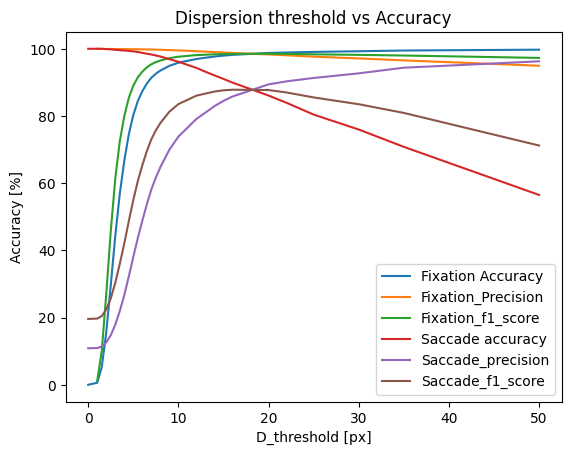

In [58]:
plt.plot(thresholds, fixation_recall, label="Fixation Accuracy")
plt.plot(thresholds, fixation_precision, label="Fixation_Precision")
plt.plot(thresholds, fixation_f1_score, label="Fixation_f1_score")
plt.plot(thresholds, saccade_recall, label="Saccade accuracy")
plt.plot(thresholds, saccade_precision, label="Saccade_precision")
plt.plot(thresholds, saccade_f1_score, label="Saccade_f1_score")



#plt.plot(thresholds, accuracy, label="Acuracy")
plt.xlabel("D_threshold [px]")
plt.ylabel("Accuracy [%]")
plt.title("Dispersion threshold vs Accuracy")
plt.legend()
plt.show()

In [59]:
print('fixation recall=',fixation_recall)
print('saccade accuracy=', saccade_recall)

fixation recall= [0.0, 0.6058943798932828, 5.216177130603899, 15.548795691417743, 29.575790820991042, 44.23444538639273, 56.79033893515517, 66.62594125567247, 74.52750211938363, 80.27061620040227, 84.43042603766685, 87.36099336757593, 89.64078525241443, 91.36455060755664, 92.58049502152629, 93.51801060522948, 94.92927076580395, 95.85016373277482, 96.96471018467727, 97.33788793031799, 97.68862514337007, 97.96456058112668, 98.18397912199339, 98.75745939925864, 98.90124503399325, 99.06747120131651, 99.26943599461427, 99.48469888129789, 99.73320700144616]
saccade accuracy= [100.0, 100.0, 99.98636487592037, 99.91137169348241, 99.84319607308427, 99.69320970820834, 99.5773111535315, 99.4886828470139, 99.37278429233706, 99.22279792746114, 99.05235887646577, 98.7796563948732, 98.53422416143987, 98.30242705208617, 98.01608944641396, 97.70248159258249, 96.91846195800382, 96.14125988546496, 94.31415325879466, 93.161985274066, 92.09844559585493, 91.02808835560404, 89.9372784292337, 86.0853558767384